### 1. Data Loading and Initial Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
# Load data
df = pd.read_csv('world_risk_index.csv')
# Inspect data
df.head()
df.info()

# Check missing values
df.isnull().sum()




<class 'pandas.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   str    
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   str    
 9   WRI Category                  1916 non-null   str    
 10  Vulnerability Category        1913 non-null   str    
 11  Susceptibility Category       1917 non-null   str    
dtypes: float64(6), int64(1), str(5)
memory usage: 179.8 KB


Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

In [3]:
df.dtypes

Region                              str
WRI                             float64
Exposure                        float64
Vulnerability                   float64
Susceptibility                  float64
Lack of Coping Capabilities     float64
 Lack of Adaptive Capacities    float64
Year                              int64
Exposure Category                   str
WRI Category                        str
Vulnerability Category              str
Susceptibility Category             str
dtype: object

In [4]:
print(df.columns)



Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', ' Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='str')


In [5]:
# Standardise column names
df.columns = (
    df.columns
    .str.strip()              # removes leading/trailing spaces
    .str.replace(" ", "_")    # replaces spaces with underscores
)


In [6]:
df_year1 = df[df["Year"] == df["Year"].min()]
df_year2 = df[df["Year"] == df["Year"].max()]


In [7]:
num_cols = df.select_dtypes(include=[np.number])
num_cols

,WRI,Exposure,Vulnerability,Susceptibility,Lack_of_Coping_Capabilities,Lack_of_Adaptive_Capacities,Year
0,32.00,56.33,56.81,37.14,79.34,53.96,2011
1,29.08,56.04,51.90,28.94,81.80,44.97,2011
2,24.32,45.09,53.93,34.99,82.78,44.01,2011
3,23.51,36.40,64.60,44.11,85.95,63.74,2011
4,20.88,38.42,54.35,35.36,77.83,49.87,2011
...,...,...,...,...,...,...,...
1912,1.42,3.13,45.39,24.54,68.82,42.82,2016
1913,1.32,3.46,38.26,18.20,50.29,46.29,2016
1914,1.14,2.93,38.96,14.80,65.01,37.07,2016
1915,0.60,1.65,36.25,15.97,59.33,33.44,2016


In [8]:
df.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack_of_Coping_Capabilities    0
Lack_of_Adaptive_Capacities    1
Year                           0
Exposure_Category              0
WRI_Category                   1
Vulnerability_Category         4
Susceptibility_Category        0
dtype: int64

In [9]:
if not num_cols.empty:
    simple_imp = SimpleImputer(strategy='mean')
    df[num_cols.columns] = simple_imp.fit_transform(df[num_cols.columns])

In [10]:
df.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack_of_Coping_Capabilities    0
Lack_of_Adaptive_Capacities    0
Year                           0
Exposure_Category              0
WRI_Category                   1
Vulnerability_Category         4
Susceptibility_Category        0
dtype: int64

In [11]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

C:\Users\Maheema\AppData\Local\Temp\ipykernel_25580\3630973234.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=['object'])


,Region,Exposure_Category,WRI_Category,Vulnerability_Category,Susceptibility_Category
0,Vanuatu,Very High,Very High,High,High
1,Tonga,Very High,Very High,Medium,Medium
2,Philippinen,Very High,Very High,High,High
3,Salomonen,Very High,Very High,Very High,High
4,Guatemala,Very High,Very High,High,High
...,...,...,...,...,...
1912,Grenada,Very Low,Very Low,Medium,Medium
1913,Barbados,Very Low,Very Low,Low,Low
1914,Saudi Arabia,Very Low,Very Low,Low,Very Low
1915,Malta,Very Low,Very Low,Low,Very Low


In [12]:
if not cat_cols.empty:
    mode_imp = SimpleImputer(strategy='most_frequent')
    df[cat_cols.columns] = mode_imp.fit_transform(df[cat_cols.columns])

In [13]:
df.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack_of_Coping_Capabilities    0
Lack_of_Adaptive_Capacities    0
Year                           0
Exposure_Category              0
WRI_Category                   0
Vulnerability_Category         0
Susceptibility_Category        0
dtype: int64

In [14]:
df_year1[["WRI", "Exposure", "Vulnerability"]].describe()
df_year2[["WRI", "Exposure", "Vulnerability"]].describe()


,WRI,Exposure,Vulnerability
count,181.000000,181.000000,181.000000
mean,7.897901,16.503646,46.750166
std,6.284774,11.942985,13.842851
min,0.300000,0.850000,22.680000
25%,3.560000,10.400000,36.460000
50%,6.600000,13.130000,46.370000
75%,9.660000,17.740000,57.340000
max,47.730000,82.550000,75.830000


In [15]:
df.groupby("Year")["WRI"].median()


Year
2011.0    6.830
2012.0    6.630
2013.0    6.570
2014.0    6.590
2015.0    6.550
2016.0    6.390
2017.0    6.570
2018.0    6.165
2019.0    6.485
2020.0    6.420
2021.0    6.600
Name: WRI, dtype: float64

In [16]:
df_year1[["WRI", "Exposure", "Vulnerability"]].corr()
df_year2[["WRI", "Exposure", "Vulnerability"]].corr()


,WRI,Exposure,Vulnerability
WRI,1.000000,0.926417,0.428064
Exposure,0.926417,1.000000,0.110973
Vulnerability,0.428064,0.110973,1.000000


In [17]:
stats_2011 = df[df["Year"] == 2011][["WRI", "Exposure"]].describe()
stats_2021 = df[df["Year"] == 2021][["WRI", "Exposure"]].describe()

stats_2011, stats_2021


(              WRI    Exposure
 count  173.000000  173.000000
 mean     7.595029   14.989538
 std      4.989967    8.606478
 min      0.020000    0.050000
 25%      3.770000   10.230000
 50%      6.830000   12.910000
 75%      9.470000   16.230000
 max     32.000000   56.330000,
               WRI    Exposure
 count  181.000000  181.000000
 mean     7.897901   16.503646
 std      6.284774   11.942985
 min      0.300000    0.850000
 25%      3.560000   10.400000
 50%      6.600000   13.130000
 75%      9.660000   17.740000
 max     47.730000   82.550000)

In [18]:
pd.crosstab(
    df["Year"],
    df["WRI"],
    normalize="index"
)




WRI,0.02,0.08,0.09,0.10,0.30,0.31,0.36,0.54,0.57,0.60,...,36.28,36.31,36.43,36.45,36.50,36.72,47.73,49.74,50.28,56.71
Year,,,,,,,,,,,,,,,,,,,,,
2011.0,0.00578,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012.0,0.00000,0.000000,0.000000,0.00578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00578,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013.0,0.00000,0.000000,0.000000,0.00578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014.0,0.00000,0.005848,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.005848,0.000000,0.000000,0.000000,0.000000,0.000000
2015.0,0.00000,0.005848,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.005848,0.000000,0.000000,0.000000,0.000000
2016.0,0.00000,0.005848,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848,...,0.005848,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017.0,0.00000,0.000000,0.005848,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.005848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005814,0.000000,0.005814,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005814,0.000000
2019.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.005556,0.000000,0.005556,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005556


In [19]:
wri_change = df.pivot(
    index="Region",
    columns="Year",
    values="WRI"
)

wri_change["Change"] = wri_change.iloc[:,1] - wri_change.iloc[:,0]

wri_change_sorted = wri_change.sort_values('Change')

# 2. Add percentage change
wri_change_sorted['Pct_Change'] = (wri_change_sorted['Change'] / wri_change_sorted.iloc[:,0]) * 100

# 3. Create top/bottom lists
top_improved = wri_change_sorted.head(10)  # Most negative change
top_worsened = wri_change_sorted.tail(10)
wri_change.describe()

Year,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Change
count,173.000000,173.000000,173.000000,171.000000,171.000000,171.000000,171.000000,172.000000,180.000000,181.000000,181.000000,167.000000
mean,7.595029,7.462023,7.400289,7.395673,7.339298,7.282456,7.380468,7.475640,7.892722,7.892541,7.897901,-0.129281
std,4.989967,5.113173,5.064684,5.159507,5.138566,5.134347,5.119761,5.919277,6.568529,6.244831,6.284774,1.230880
min,0.020000,0.100000,0.100000,0.080000,0.080000,0.080000,0.090000,0.360000,0.310000,0.310000,0.300000,-5.480000
25%,3.770000,3.830000,3.840000,3.795000,3.755000,3.570000,3.760000,3.480000,3.552500,3.610000,3.560000,-0.565000
50%,6.830000,6.630000,6.570000,6.590000,6.550000,6.390000,6.570000,6.165000,6.485000,6.420000,6.600000,-0.030000
75%,9.470000,9.000000,8.890000,9.085000,8.970000,8.890000,8.985000,9.365000,9.527500,9.640000,9.660000,0.280000
max,32.000000,36.310000,36.430000,36.500000,36.720000,36.280000,36.450000,50.280000,56.710000,49.740000,47.730000,4.310000


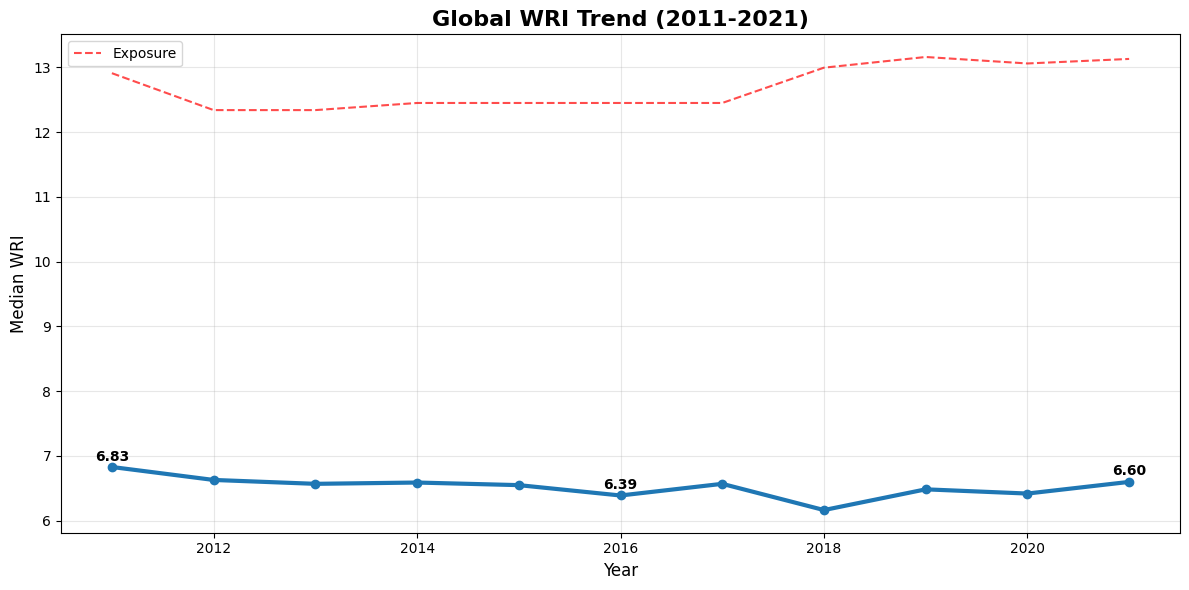

In [21]:
# Build on your existing code:
wri_trend = df.groupby("Year")["WRI"].median()

plt.figure(figsize=(12, 6))
# Your existing line
plt.plot(wri_trend.index, wri_trend.values, linewidth=3, marker='o')

# Add these enhancements:
# 1. Add exposure trend for comparison
exposure_trend = df.groupby("Year")["Exposure"].median()
plt.plot(exposure_trend.index, exposure_trend.values, 'r--', alpha=0.7, label='Exposure')

# 2. Annotate key years
for year, value in wri_trend.items():
    if year in [2011, 2016, 2021]:  # Key years
        plt.text(year, value+0.1, f'{value:.2f}', ha='center', fontweight='bold')

plt.title("Global WRI Trend (2011-2021)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median WRI", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

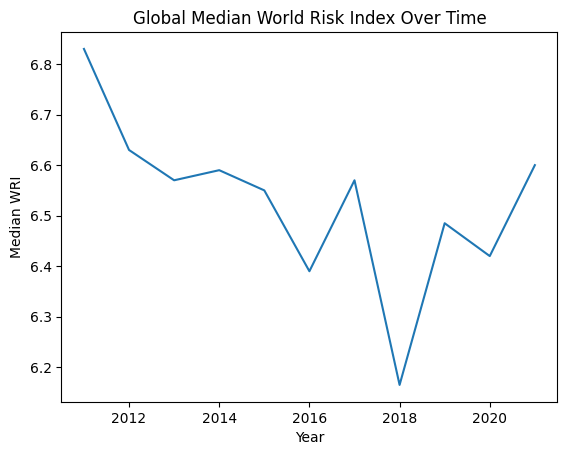

In [22]:
wri_trend = df.groupby("Year")["WRI"].median()

plt.figure()
plt.plot(wri_trend.index, wri_trend.values)
plt.xlabel("Year")
plt.ylabel("Median WRI")
plt.title("Global Median World Risk Index Over Time")
plt.show()


In [23]:
# Calculate component changes for top improved/worsened regions
components = ['Exposure', 'Vulnerability', 'Susceptibility']

# For a sample region from your top lists
sample_region = top_improved.index[0]  # Most improved region
region_data = df[df['Region'] == sample_region]

print(f"\nCOMPONENT ANALYSIS FOR {sample_region}:")
print("2011 vs 2021 Comparison:")
for comp in components:
    val_2011 = region_data[region_data['Year'] == 2011][comp].values[0]
    val_2021 = region_data[region_data['Year'] == 2021][comp].values[0]
    change = val_2021 - val_2011
    print(f"{comp}: {val_2011:.2f} → {val_2021:.2f} (Δ: {change:+.2f})")


COMPONENT ANALYSIS FOR Bhutan:
2011 vs 2021 Comparison:
Exposure: 24.63 → 6.90 (Δ: -17.73)
Vulnerability: 55.42 → 47.12 (Δ: -8.30)
Susceptibility: 34.56 → 23.72 (Δ: -10.84)


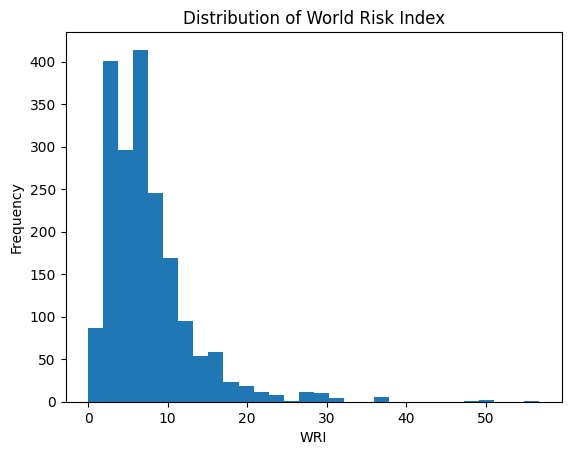

In [24]:
plt.figure()
plt.hist(df["WRI"], bins=30)
plt.xlabel("WRI")
plt.ylabel("Frequency")
plt.title("Distribution of World Risk Index")
plt.show()


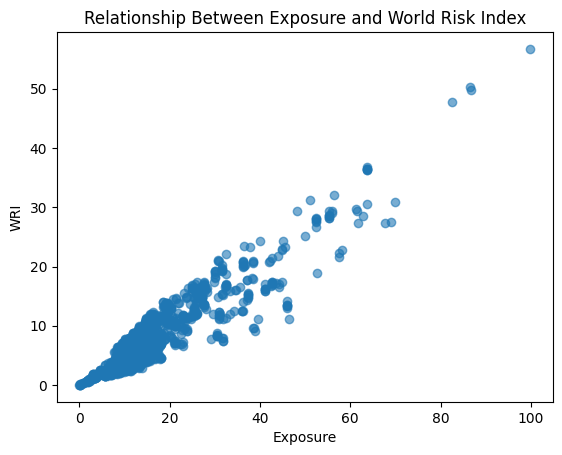

In [25]:
plt.figure()
plt.scatter(df["Exposure"], df["WRI"], alpha=0.6)
plt.xlabel("Exposure")
plt.ylabel("WRI")
plt.title("Relationship Between Exposure and World Risk Index")
plt.show()


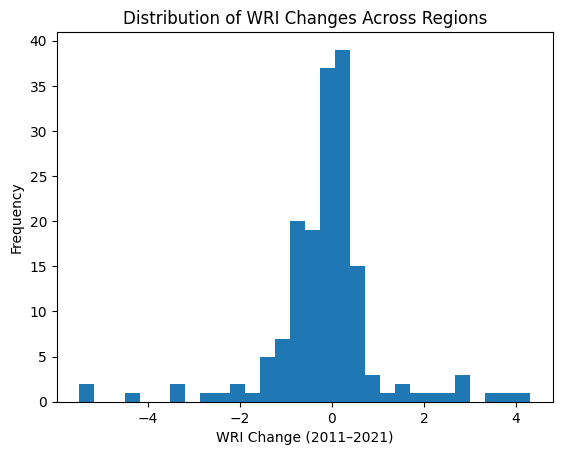

In [26]:
plt.figure()
plt.hist(wri_change["Change"], bins=30)
plt.xlabel("WRI Change (2011–2021)")
plt.ylabel("Frequency")
plt.title("Distribution of WRI Changes Across Regions")
plt.show()


In [27]:
YEAR = 2021
df_final = df[df["Year"] == YEAR]


In [28]:
analysis_cols = [
    "WRI",
    "Exposure",
    "Vulnerability",
    "Susceptibility",
    "Lack_of_Coping_Capabilities",
    "Lack_of_Adaptive_Capacities"
]


In [29]:
df_final[analysis_cols].describe()


,WRI,Exposure,Vulnerability,Susceptibility,Lack_of_Coping_Capabilities,Lack_of_Adaptive_Capacities
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,7.897901,16.503646,46.750166,29.573591,71.816630,38.860718
std,6.284774,11.942985,13.842851,15.242505,14.267372,14.464290
min,0.300000,0.850000,22.680000,9.030000,38.350000,14.220000
25%,3.560000,10.400000,36.460000,17.680000,60.290000,27.340000
50%,6.600000,13.130000,46.370000,23.720000,75.080000,38.420000
75%,9.660000,17.740000,57.340000,39.670000,83.280000,50.290000
max,47.730000,82.550000,75.830000,70.520000,93.170000,70.130000


In [30]:
corr = df_final[analysis_cols].corr()
corr


,WRI,Exposure,Vulnerability,Susceptibility,Lack_of_Coping_Capabilities,Lack_of_Adaptive_Capacities
WRI,1.000000,0.926417,0.428064,0.363139,0.404542,0.447254
Exposure,0.926417,1.000000,0.110973,0.066369,0.111604,0.138533
Vulnerability,0.428064,0.110973,1.000000,0.929883,0.929650,0.974203
Susceptibility,0.363139,0.066369,0.929883,1.000000,0.753147,0.873111
Lack_of_Coping_Capabilities,0.404542,0.111604,0.929650,0.753147,1.000000,0.889063
Lack_of_Adaptive_Capacities,0.447254,0.138533,0.974203,0.873111,0.889063,1.000000


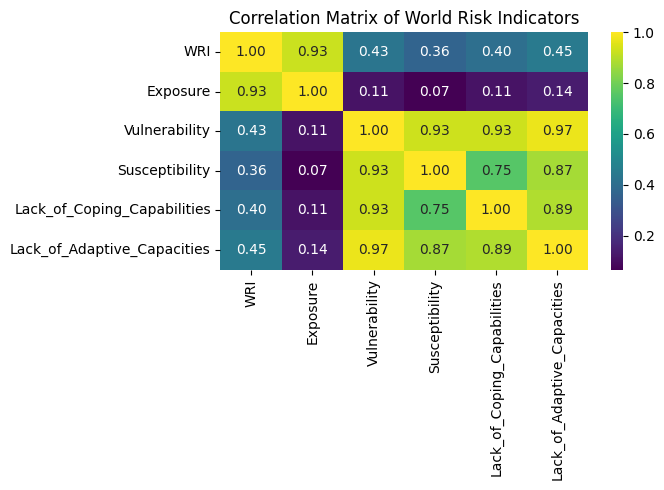

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix of World Risk Indicators")
plt.tight_layout()
plt.show()


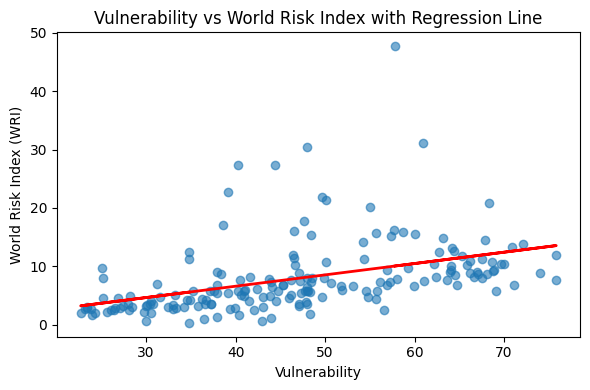

In [32]:
x = df_final["Vulnerability"]
y = df_final["WRI"]

# Fit regression line
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.6)
plt.plot(x, m*x + b, color="red", linewidth=2)

plt.xlabel("Vulnerability")
plt.ylabel("World Risk Index (WRI)")
plt.title("Vulnerability vs World Risk Index with Regression Line")
plt.tight_layout()
plt.show()



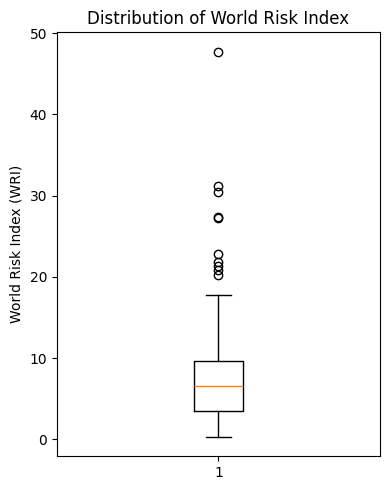

In [33]:
plt.figure(figsize=(4,5))
plt.boxplot(df_final["WRI"], vert=True)
plt.ylabel("World Risk Index (WRI)")
plt.title("Distribution of World Risk Index")
plt.tight_layout()
plt.show()


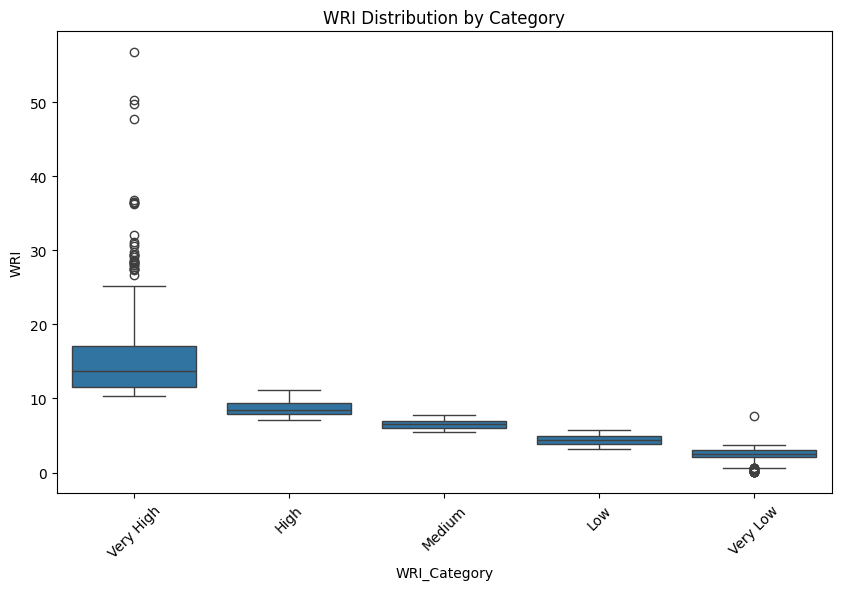

In [34]:
# Boxplot of WRI by category
plt.figure(figsize=(10, 6))
sns.boxplot(x="WRI_Category", y="WRI", data=df)
plt.xticks(rotation=45)
plt.title("WRI Distribution by Category")
plt.show()




Paired T-Test, Anova, correlation test, chi square test

In [35]:
from scipy.stats import ttest_rel

# Get regions with data in both 2011 and 2021
regions_both_years = set(df[df['Year'] == 2011]['Region']) & set(df[df['Year'] == 2021]['Region'])

# Extract WRI for paired t-test
wri_2011 = df[(df['Year'] == 2011) & (df['Region'].isin(regions_both_years))].sort_values('Region')['WRI']
wri_2021 = df[(df['Year'] == 2021) & (df['Region'].isin(regions_both_years))].sort_values('Region')['WRI']

# Paired t-test
t_stat, p_value = ttest_rel(wri_2011, wri_2021)

print("="*60)
print("PAIRED T-TEST: Global Risk Change (2011 vs 2021)")
print("="*60)
print(f"Sample Size: {len(wri_2011)} regions with data in both years")
print(f"Mean WRI 2011: {wri_2011.mean():.3f}")
print(f"Mean WRI 2021: {wri_2021.mean():.3f}")
print(f"Mean Difference: {wri_2021.mean() - wri_2011.mean():.3f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significant at α=0.05? {'YES' if p_value < 0.05 else 'NO'}")
if p_value < 0.05:
    direction = "increased" if wri_2021.mean() > wri_2011.mean() else "decreased"
    print(f"Conclusion: Global risk has significantly {direction} from 2011 to 2021")
else:
    print("Conclusion: No significant change in global risk from 2011 to 2021")
print("="*60)

PAIRED T-TEST: Global Risk Change (2011 vs 2021)
Sample Size: 165 regions with data in both years
Mean WRI 2011: 7.694
Mean WRI 2021: 7.919
Mean Difference: 0.224
T-statistic: -1.0023
P-value: 0.317667
Significant at α=0.05? NO
Conclusion: No significant change in global risk from 2011 to 2021


In [ ]:

# Used the latest year for a cleaner analysis
latest_year = df['Year'].max()
latest_df = df[df['Year'] == latest_year].dropna(subset=['WRI_Category', 'Exposure'])

# One-way ANOVA
categories = latest_df['WRI_Category'].unique()
category_groups = [latest_df[latest_df['WRI_Category'] == cat]['Exposure'] for cat in categories]

f_stat, p_value = f_oneway(*category_groups)

print("\n" + "="*60)
print("ONE-WAY ANOVA: Exposure Levels Across Risk Categories")
print("="*60)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Significant difference? {'YES' if p_value < 0.05 else 'NO'}")

if p_value < 0.05:
    # Post-hoc Tukey HSD test
    tukey = pairwise_tukeyhsd(
        endog=latest_df['Exposure'],
        groups=latest_df['WRI_Category'],
        alpha=0.05
    )
    
    print("\nPOST-HOC TUKEY HSD TEST (Significant Pairs Only):")
    tukey_summary = tukey.summary()
    
    # Extract significant pairs
    significant_pairs = []
    for i in range(len(tukey_summary.data[1:])):
        row = tukey_summary.data[i+1]
        if float(row[6]) < 0.05:  # p-value column
            significant_pairs.append(f"{row[0]} vs {row[1]}: p = {float(row[6]):.4f}")
    
    if significant_pairs:
        for pair in significant_pairs[:5]:  # Show top 5
            print(f"  - {pair}")
        if len(significant_pairs) > 5:
            print(f"  ... and {len(significant_pairs)-5} more significant pairs")
    else:
        print("  No significant pairwise differences found")
else:
    print("\nNo post-hoc test needed (ANOVA not significant)")
print("="*60)


ONE-WAY ANOVA: Exposure Levels Across Risk Categories
F-statistic: 55.0563
P-value: 0.0000000000
Significant difference? YES

POST-HOC TUKEY HSD TEST (Significant Pairs Only):
  - High vs Medium: p = 0.0000
  - Low vs Medium: p = 0.0000
  - Low vs Very Low: p = 0.0000


In [37]:
from scipy.stats import pearsonr, spearmanr

# Test correlation between WRI and its components
print("\n" + "="*60)
print("CORRELATION TESTS: WRI vs Key Components")
print("="*60)

components = ['Exposure', 'Vulnerability', 'Susceptibility']
latest_df = df[df['Year'] == df['Year'].max()]  # Use latest data

for component in components:
    # Remove any missing values
    data = latest_df[['WRI', component]].dropna()
    
    if len(data) > 2:  # Need at least 3 points for correlation
        # Pearson correlation (linear)
        pearson_corr, pearson_p = pearsonr(data['WRI'], data[component])
        
        # Spearman correlation (monotonic)
        spearman_corr, spearman_p = spearmanr(data['WRI'], data[component])
        
        print(f"\n{component}:")
        print(f"  Pearson r = {pearson_corr:.4f}, p = {pearson_p:.6f}")
        print(f"  Spearman ρ = {spearman_corr:.4f}, p = {spearman_p:.6f}")
        
        # Interpretation
        if pearson_p < 0.05:
            strength = "strong" if abs(pearson_corr) > 0.7 else "moderate" if abs(pearson_corr) > 0.3 else "weak"
            direction = "positive" if pearson_corr > 0 else "negative"
            print(f"  → Significant {strength} {direction} linear relationship")
print("="*60)


CORRELATION TESTS: WRI vs Key Components

Exposure:
  Pearson r = 0.9264, p = 0.000000
  Spearman ρ = 0.8797, p = 0.000000
  → Significant strong positive linear relationship

Vulnerability:
  Pearson r = 0.4281, p = 0.000000
  Spearman ρ = 0.6551, p = 0.000000
  → Significant moderate positive linear relationship

Susceptibility:
  Pearson r = 0.3631, p = 0.000001
  Spearman ρ = 0.6430, p = 0.000000
  → Significant moderate positive linear relationship


In [38]:
from scipy.stats import pearsonr, spearmanr

# Test correlation between WRI and its components
print("\n" + "="*60)
print("CORRELATION TESTS: WRI vs Key Components")
print("="*60)

components = ['Exposure', 'Vulnerability', 'Susceptibility']
latest_df = df[df['Year'] == df['Year'].max()]  # Use latest data

for component in components:
    # Remove any missing values
    data = latest_df[['WRI', component]].dropna()
    
    if len(data) > 2:  # Need at least 3 points for correlation
        # Pearson correlation (linear)
        pearson_corr, pearson_p = pearsonr(data['WRI'], data[component])
        
        # Spearman correlation (monotonic)
        spearman_corr, spearman_p = spearmanr(data['WRI'], data[component])
        
        print(f"\n{component}:")
        print(f"  Pearson r = {pearson_corr:.4f}, p = {pearson_p:.6f}")
        print(f"  Spearman ρ = {spearman_corr:.4f}, p = {spearman_p:.6f}")
        
        # Interpretation
        if pearson_p < 0.05:
            strength = "strong" if abs(pearson_corr) > 0.7 else "moderate" if abs(pearson_corr) > 0.3 else "weak"
            direction = "positive" if pearson_corr > 0 else "negative"
            print(f"  → Significant {strength} {direction} linear relationship")
print("="*60)


CORRELATION TESTS: WRI vs Key Components

Exposure:
  Pearson r = 0.9264, p = 0.000000
  Spearman ρ = 0.8797, p = 0.000000
  → Significant strong positive linear relationship

Vulnerability:
  Pearson r = 0.4281, p = 0.000000
  Spearman ρ = 0.6551, p = 0.000000
  → Significant moderate positive linear relationship

Susceptibility:
  Pearson r = 0.3631, p = 0.000001
  Spearman ρ = 0.6430, p = 0.000000
  → Significant moderate positive linear relationship


In [39]:
from scipy.stats import chi2_contingency

# Create contingency table of risk categories in 2011 vs 2021
categories = df['WRI_Category'].dropna().unique()

# Get category counts for each year
cat_2011 = df[df['Year'] == 2011]['WRI_Category'].value_counts().reindex(categories, fill_value=0)
cat_2021 = df[df['Year'] == 2021]['WRI_Category'].value_counts().reindex(categories, fill_value=0)

# Create contingency table
contingency_table = pd.DataFrame({
    '2011': cat_2011,
    '2021': cat_2021
}).T

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*60)
print("CHI-SQUARE TEST: Risk Category Distribution Change")
print("="*60)
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")
print(f"Significant change in distribution? {'YES' if p_value < 0.05 else 'NO'}")

if p_value < 0.05:
    print("\nSTANDARDIZED RESIDUALS (where |residual| > 2 indicates unusual change):")
    residuals = (contingency_table.values - expected) / np.sqrt(expected)
    residuals_df = pd.DataFrame(residuals, 
                                index=contingency_table.index, 
                                columns=contingency_table.columns)
    
    # Highlight significant residuals
    for year_idx, year in enumerate(contingency_table.index):
        for cat_idx, cat in enumerate(contingency_table.columns):
            res = residuals[year_idx, cat_idx]
            if abs(res) > 2:
                direction = "more" if res > 0 else "fewer"
                print(f"  - {year} had {direction} '{cat}' regions than expected (residual = {res:.2f})")
print("="*60)


CHI-SQUARE TEST: Risk Category Distribution Change
Contingency Table:
WRI_Category  Very High  High  Medium  Low  Very Low
2011                 34    33      36   35        35
2021                 36    36      36   36        37

Chi-square statistic: 0.0765
Degrees of freedom: 4
P-value: 0.999287
Significant change in distribution? NO
